# TASK 1

In [6]:
import string
from collections import Counter
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [114]:
import GetOldTweets3 as got
def get_tweets(keyword,start,end,mxm):
    tweet_criteria=got.manager.TweetCriteria().setQuerySearch(keyword).setSince(start).setUntil(end)\
    .setMaxTweets(mxm)
    tweets=got.manager.TweetManager.getTweets(tweet_criteria)
    text=[[tweet.text] for tweet in tweets]
    return text

In [193]:
# We are taking data one month prior to the corona outbreak in India
# and one month after the outbreak here and comparing people's emotions

In [117]:
before=get_tweets('corona virus', '2020-01-01','2020-02-15',1500)

In [118]:
before

[['Updated counts from Hubei Province, China: 2,420 new cases and 139 additional deaths #COVID-19 #COVID19 #coronavirus #JohnsHopkinsCSSE'],
 ['going on a 19days rampage because coronavirus a btch and slowed down the production of my daily serotonin content by 93%'],
 ['The number of new deaths in China’s central Hubei province from the coronavirus outbreak rises by 139 in one day, says the province’s health commission. '],
 ['China Now Censoring Coronavirus Critics in US '],
 [' Lo que debemos hacer para protegernos del coronavirus #Vídeo'],
 ['Coronavirus update. 66,887 infected 1,523 deaths 8,058 recovered https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 #Coronavirus #china #outbreak'],
 ["Year of the lockdown… 6.5 per cent of the world's population under lockdown due to #coronavirus #COVID19"],
 ["British scientist leading coronavirus fight says forecasts for 400,000 UK deaths are 'not absurd' amid rising panic "],
 ['It appears they

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/harshvardhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [194]:
text_before=''
for i in range(0,len(before)):
    text_before=text_before+'. '+before[i][0]
lower=text_before.lower()

cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

from nltk.tokenize import word_tokenize
tokens=word_tokenize(cleaned_text,'english')

In [195]:
len(tokens)

29244

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/harshvardhan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [196]:
stop_words=stopwords.words('english')
stop_words.remove('nor')
stop_words.remove('no')
stop_words.remove('not')

In [197]:
from nltk.corpus import stopwords
words=[word for word in tokens if word not in stop_words]

In [198]:
len(words)

22048

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/harshvardhan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [199]:
from nltk.stem import WordNetLemmatizer
lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]

In [200]:
len(lemma)

22048

In [201]:
clear_line=''
emotion_list=[]
with open('Downloads/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)

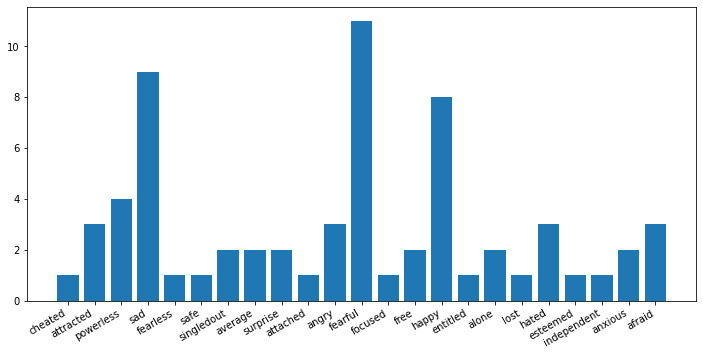

In [202]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [88]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harshvardhan/nltk_data...


True

In [203]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_text)

{'neg': 0.106, 'neu': 0.83, 'pos': 0.065, 'compound': -1.0}

In [135]:
# After the outbreak
after=get_tweets('corona virus','2020-03-25','2020-04-30',1500)

In [204]:
text_after=''
for i in range(0,len(after)):
    text_after=text_after+'. '+after[i][0]
lower_after=text_after.lower()

cleaned_after=lower_after.translate(str.maketrans('','',string.punctuation))

words_a=word_tokenize(cleaned_after,'english')

In [205]:
len(words_a)

32921

In [206]:
words_as=[word for word in words_a if word not in stop_words]
len(words_as)

26082

In [207]:
lemma_a=[WordNetLemmatizer().lemmatize(word) for word in words_as]
len(lemma_a)

26082

In [208]:
clear_line=''
emotion_list=[]
with open('Downloads/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma_a:
            emotion_list.append(emotion)
            
w1=Counter(emotion_list)

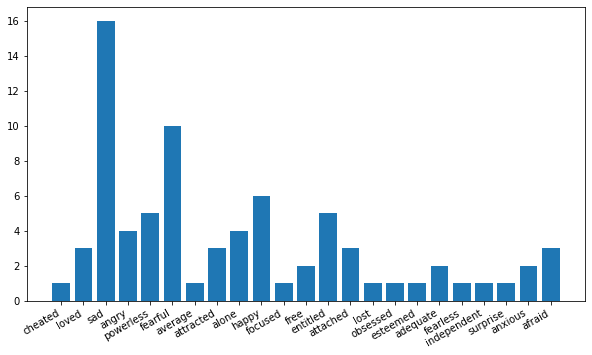

In [209]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(w1.keys(),w1.values())
fig.autofmt_xdate()
plt.show()

In [192]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_after)

{'neg': 0.101, 'neu': 0.835, 'pos': 0.064, 'compound': -1.0}

In [210]:
# We can clearly see from the two graphs that intensity of Sadness has increased tremendously

# TASK 2

In [252]:
text=''
with open('task2.txt','r') as file:
    for line in file:
        text=text+''+line

In [253]:
text=text.replace('\n',' ')

In [254]:
lower=text.lower()
cleaned=lower.translate(str.maketrans('?','.',string.punctuation))
tokens=word_tokenize(cleaned,'english')
print(len(tokens))

words=[word for word in tokens if word not in stop_words]
print(len(words))

lemma=[WordNetLemmatizer().lemmatize(word) for word in words]
print(len(lemma))

300
174
174


In [255]:
cleaned

'two madhya pradesh officials were transferred on friday after bjps national general secretary kailash vijayvargiya questioned the police action against traders and the local youth of the states khargone district for celebrating the groundbreaking ceremony of the ram mandir in ayodhya with fireworks on the streets why is the khargone police behaving like bengal police kailash vijayvargiya said on twitter while strongly condemning the police action  the senior bjp leader while sharing a video of the incident on twitter wrote prime minister narendra modi ji has said that today is a day of glory for the country the foundation stone of the ram temple was laid in ayodhya the whole country is celebrating in such a situation police action on youths celebrating and cheering at the saraffa bazar of khargone is unfair  mr vijavargiya also tagged state home minister narrotam mishra on his post and advised him to make his police force understand  on wednesday as the groundbreaking ceremony of the 

In [256]:
print(lemma)

['two', 'madhya', 'pradesh', 'official', 'transferred', 'friday', 'bjps', 'national', 'general', 'secretary', 'kailash', 'vijayvargiya', 'questioned', 'police', 'action', 'trader', 'local', 'youth', 'state', 'khargone', 'district', 'celebrating', 'groundbreaking', 'ceremony', 'ram', 'mandir', 'ayodhya', 'firework', 'street', 'khargone', 'police', 'behaving', 'like', 'bengal', 'police', 'kailash', 'vijayvargiya', 'said', 'twitter', 'strongly', 'condemning', 'police', 'action', 'senior', 'bjp', 'leader', 'sharing', 'video', 'incident', 'twitter', 'wrote', 'prime', 'minister', 'narendra', 'modi', 'ji', 'said', 'today', 'day', 'glory', 'country', 'foundation', 'stone', 'ram', 'temple', 'laid', 'ayodhya', 'whole', 'country', 'celebrating', 'situation', 'police', 'action', 'youth', 'celebrating', 'cheering', 'saraffa', 'bazar', 'khargone', 'unfair', 'mr', 'vijavargiya', 'also', 'tagged', 'state', 'home', 'minister', 'narrotam', 'mishra', 'post', 'advised', 'make', 'police', 'force', 'underst

In [257]:
clear_line=''
emotion_list=[]
with open('Downloads/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)

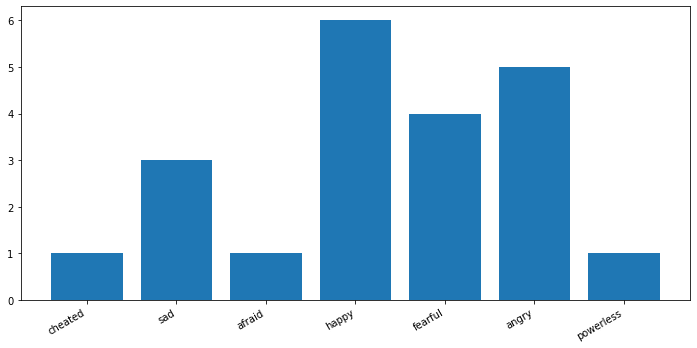

In [258]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [259]:
sia.polarity_scores(cleaned)

{'neg': 0.054, 'neu': 0.847, 'pos': 0.1, 'compound': 0.9524}

In [260]:
# Emotions has been added to emotions.txt file based on words included in the document task2.txt

# TASK 3

In [299]:
s1= ['''The following assignment is the very first assignment for Natural Language Processing given to us. 
The objective is to create two documents and create a bag of words. We are also supposed to identify how many 
words of one document also appears in other document.''']

s2= ['''This is the second document of bag of words assignment. Lets apply the concepts of Natural Language 
Processing and count vectorizer taught in the live class on these documents to check the 
similarity of words between the two documents.''']

In [300]:
from sklearn.feature_extraction.text import CountVectorizer

In [301]:
cvect=CountVectorizer(stop_words=stopwords.words('english'))
cvect.fit_transform(s1)
print(cvect.get_feature_names())

['also', 'appears', 'assignment', 'bag', 'create', 'document', 'documents', 'first', 'following', 'given', 'identify', 'language', 'many', 'natural', 'objective', 'one', 'processing', 'supposed', 'two', 'us', 'words']


In [302]:
cvect.vocabulary_

{'following': 8,
 'assignment': 2,
 'first': 7,
 'natural': 13,
 'language': 11,
 'processing': 16,
 'given': 9,
 'us': 19,
 'objective': 14,
 'create': 4,
 'two': 18,
 'documents': 6,
 'bag': 3,
 'words': 20,
 'also': 0,
 'supposed': 17,
 'identify': 10,
 'many': 12,
 'one': 15,
 'document': 5,
 'appears': 1}

In [303]:
cnew=cvect.transform(s2)
cnew=cnew.toarray()

In [304]:
import pandas as pd

In [305]:
rep=pd.DataFrame(cnew,columns=cvect.get_feature_names())
rep

,also,appears,assignment,bag,create,document,documents,first,following,given,...,language,many,natural,objective,one,processing,supposed,two,us,words
0,0,0,1,1,0,1,2,0,0,0,...,1,0,1,0,0,1,0,1,0,2


In [306]:
cnew.sum()

11

In [307]:
# Therefore, we can say that a total of 11 repetitions of B are present in A

In [308]:
# To know the words that are being repeated

In [309]:
cols=rep.columns
dic={}
for col in cols:
    if rep[col].sum()>=1:
        dic[col]=rep[col].sum()
print(dic)

{'assignment': 1, 'bag': 1, 'document': 1, 'documents': 2, 'language': 1, 'natural': 1, 'processing': 1, 'two': 1, 'words': 2}


In [310]:
# In order to know how many words of B are present in A
len(dic.keys())

9